<a href="https://colab.research.google.com/github/willamesalmeida/machine_learning/blob/master/Machine_learning_na_pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#1 Fazendo os importes da biblioteca

In [18]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

# 2 fazendo a leitura e o carregamento dos dados na memória



In [19]:
#lendo o dataset video_games_sales 
dados = pd.read_csv('/content/drive//My Drive/Colab Notebooks/Dataset/winequality-red.csv')

In [20]:
#verificando as colunas do arquivo
dados.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
#visualizando algumas linhas 
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3 Tratando os dados e fazendo limpeza

In [22]:
#verificando a quantidade de linhas e colunas
dados.shape

(1599, 12)

In [23]:
#removendo valores duplicados e visualizando se teve muita diferença utilizando shape (possuia alguns valores duplicados) 
dados = dados.drop_duplicates()
dados.shape

(1359, 12)

In [24]:
#Removendo os valores NAN (não possuia NAN)
dados = dados.dropna()
dados.shape

(1359, 12)

In [25]:
#verificando a quantidade de valores nulos dentro do dataframe
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
#renomeando as colunas para failcitar a analise posteriormente
dados = dados.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid' })
#Visualizando a tabela com a nova nomeclatura
dados.head(35)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


#4 Análise preliminar dos dados

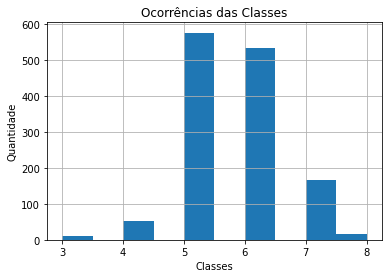

In [27]:
#verificando as pontuações da qualidade 
plt.hist(dados['quality'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [28]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
print('Qualidade 1: ', dados[dados['quality']==1].shape[0])
print('Qualidade 2: ', dados[dados['quality']==2].shape[0])
print('Qualidade 3: ', dados[dados['quality']==3].shape[0])
print('Qualidade 4: ', dados[dados['quality']==4].shape[0])
print('Qualidade 5: ', dados[dados['quality']==5].shape[0])
print('Qualidade 6: ', dados[dados['quality']==6].shape[0])
print('Qualidade 7: ', dados[dados['quality']==7].shape[0])
print('Qualidade 8: ', dados[dados['quality']==8].shape[0])
print('Qualidade 9: ', dados[dados['quality']==9].shape[0])
print('Qualidade 10: ', dados[dados['quality']==10].shape[0])

Qualidade 1:  0
Qualidade 2:  0
Qualidade 3:  10
Qualidade 4:  53
Qualidade 5:  577
Qualidade 6:  535
Qualidade 7:  167
Qualidade 8:  17
Qualidade 9:  0
Qualidade 10:  0


Verificando a distribuição de alguns atributos que podem ser importantes para a classificação do vinho

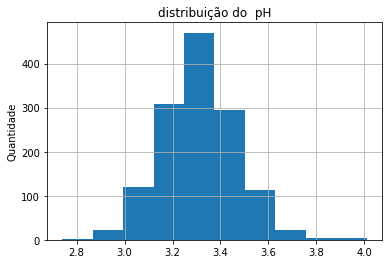

In [52]:
#verificando a distribuição do atibuto pH 
plt.hist(dados['pH'],10)
plt.ylabel('Quantidade')
plt.title('distribuição do  pH')
plt.grid(True)
plt.show()

O PH dos vinhos não passam de 4.0 e a maior ocorrência é de vinhos com PH entre 3.2 e 3.4

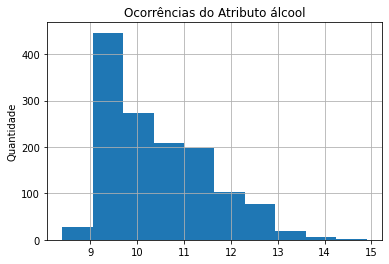

In [49]:
#verificando a distribuição do atibuto álcool
plt.hist(dados['alcohol'], 10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo álcool')
plt.grid(True)
plt.show()

O Teor alcoólico dos vinhos não passam de 15 sendo que a maior ocorrencia de teor alcoólico está entre 9 e 10

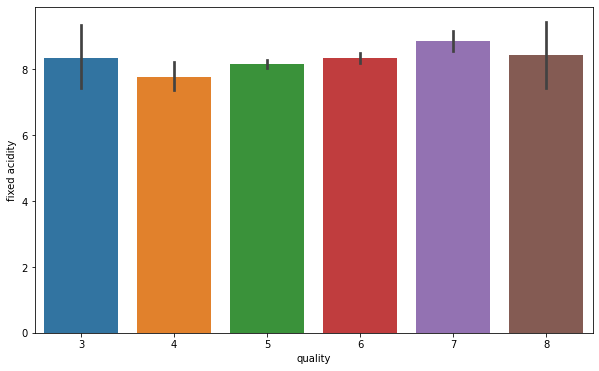

In [31]:
#Verificando a influencia de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed acidity', data = dados)

Nesse caso vemos que a ácidez fixa não influência muito na qualidade do vinho porque entre as pontuações de qualidade 

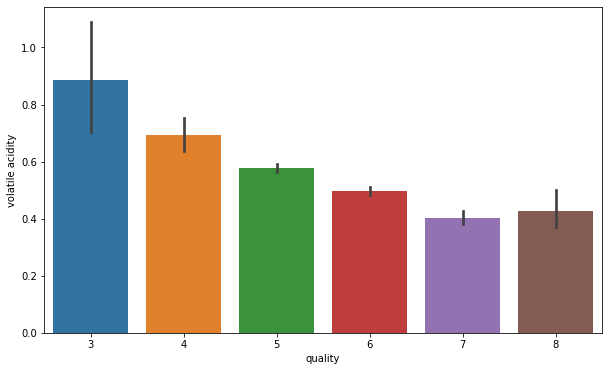

In [32]:
#Verificando a influencia da acidez volatil na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'volatile acidity', data = dados)

Vemos que com o aumento da qualidade acontece uma diminuição da acidez volátil

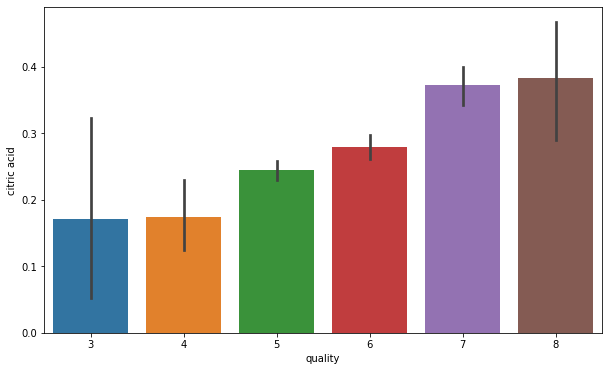

In [33]:
#Verificando a influencia do acido citrico na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'citric acid', data = dados)

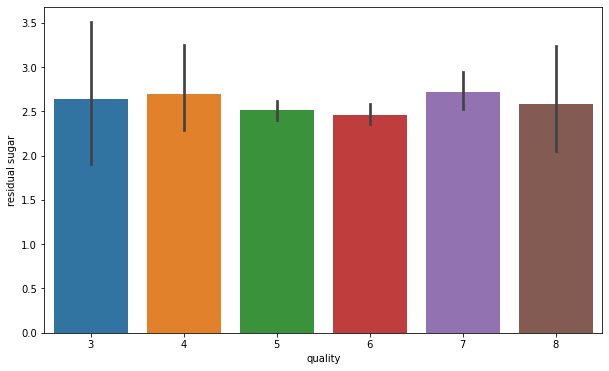

In [34]:
#Verificando a influencia do açuxar residual na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'residual sugar', data = dados)

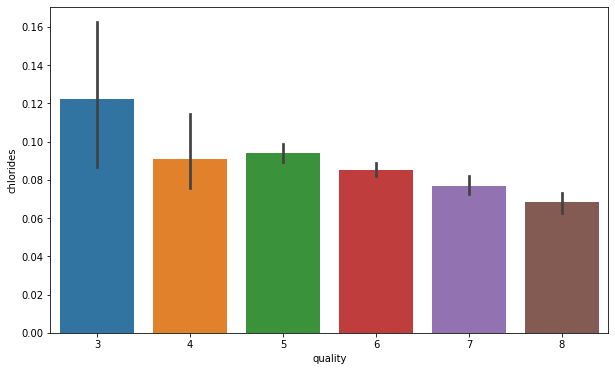

In [35]:
#Verificando a influencia do cloreto na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'chlorides', data = dados)

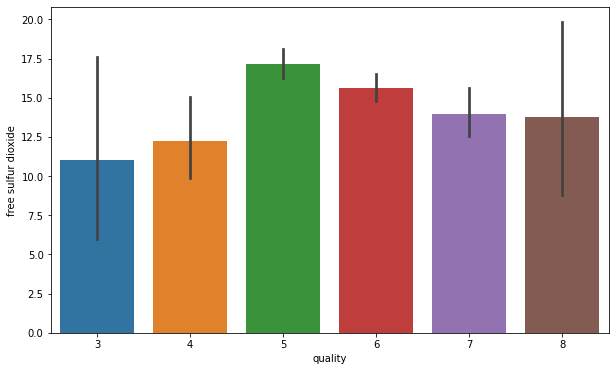

In [36]:
#Verificando a influencia do dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'free sulfur dioxide', data = dados)

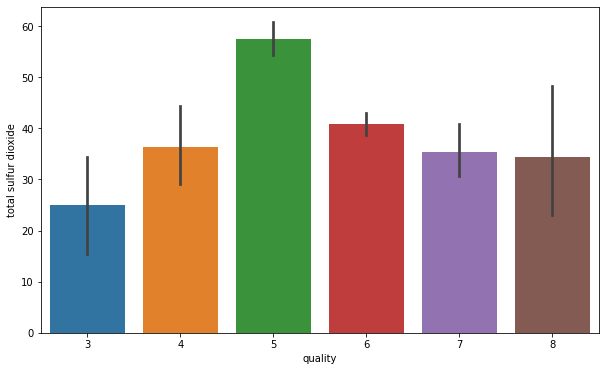

In [37]:
#Verificando a influencia do total de dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'total sulfur dioxide', data = dados)

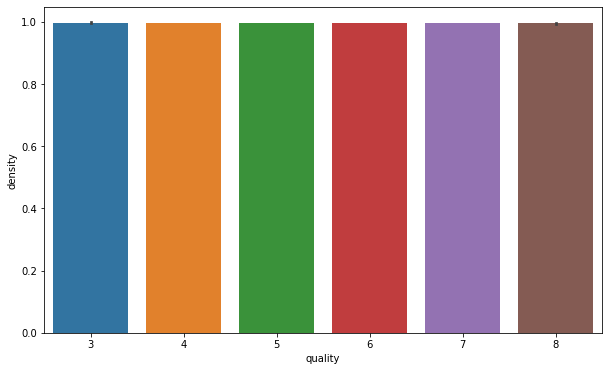

In [38]:
#Verificando a influencia do density na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'density', data = dados)

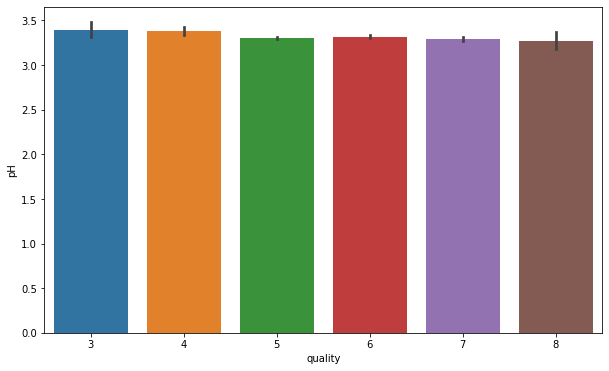

In [39]:
#Verificando a influencia do pH na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'pH', data = dados)

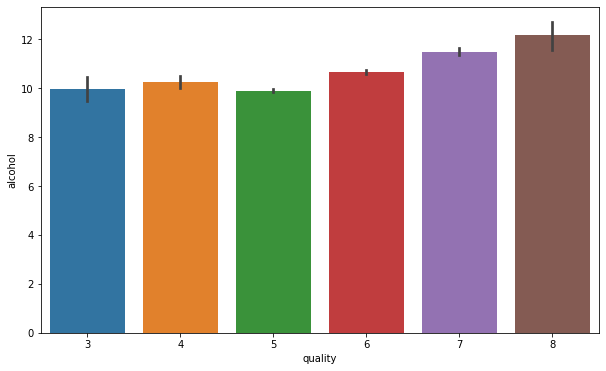

In [40]:
#Verificando a influencia do álcool na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'alcohol', data = dados)

**Boxpot**

verificando os pontos fora da curva

mediana quartis

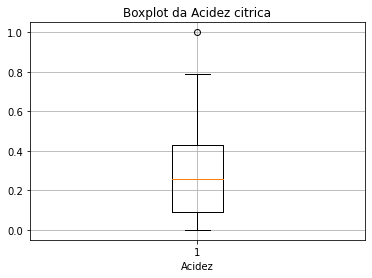

In [69]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot(dados.citric_acid)
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Acidez')
plt.grid()
plt.show()

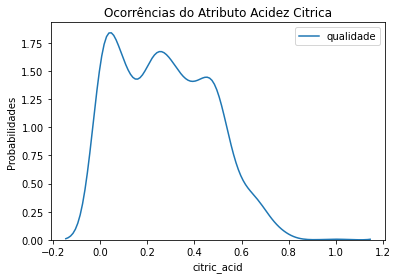

In [72]:

sns.distplot(dados.citric_acid, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

In [65]:
#verificando a correlação dos dados
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


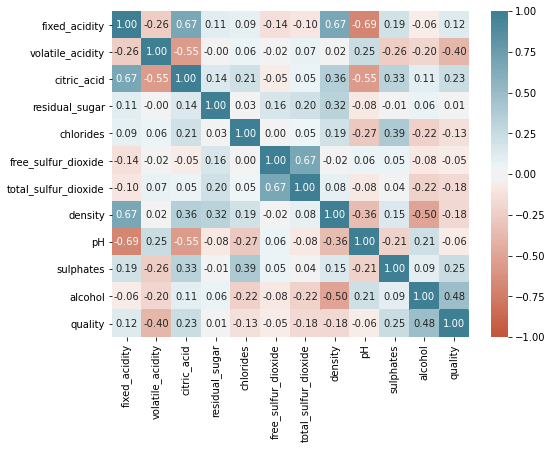

In [73]:
#Não possui muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(20, 220, n=200))


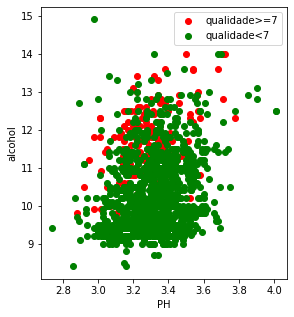

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.pH[dados.quality>=7],y=dados.alcohol[dados.quality>=7],c='red')
plt.scatter(x=dados.pH[dados.quality<7],y=dados.alcohol[dados.quality<7],c='green')
plt.xlabel('PH')
plt.ylabel('alcohol')
plt.legend(['qualidade>=7','qualidade<7'])